In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [2]:
def hesapla_uyelik(X, y):
    memberships = np.ones_like(y, dtype=float)
    for label in np.unique(y):
        class_indices = np.where(y == label)[0]
        memberships[class_indices] = 1.0 / (1.0 + np.std(X[class_indices]))
    return memberships

class BulanikSVM(SVC):
    def __init__(self, C=1.0, kernel="linear", bulanik_agirliklar=None, **kwargs):
        super().__init__(C=C, kernel=kernel, **kwargs)
        self.bulanik_agirliklar = bulanik_agirliklar

    def fit(self, X, y):
        if self.bulanik_agirliklar is not None:
            ornek_agirliklari = self.bulanik_agirliklar
        else:
            ornek_agirliklari = np.ones_like(y, dtype=float)
        super().fit(X, y, sample_weight=ornek_agirliklari)
        return self



In [3]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)



In [4]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fuzzy_uyelik = hesapla_uyelik(X_egitim, y_egitim)

fsvm_model = BulanikSVM(C=1.0, kernel="linear", bulanik_agirliklar=fuzzy_uyelik)
fsvm_model.fit(X_egitim, y_egitim)

y_tahmin = fsvm_model.predict(X_test)



In [5]:
dogruluk = accuracy_score(y_test, y_tahmin)
precision = precision_score(y_test, y_tahmin)
recall = recall_score(y_test, y_tahmin)
f1 = f1_score(y_test, y_tahmin)
cm = confusion_matrix(y_test, y_tahmin)



In [6]:
print(f"Doğruluk: {dogruluk:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Skoru: {f1:.2f}")
print(f"Confusion Matrix:\n{cm}")



Doğruluk: 0.83
Precision: 0.80
Recall: 0.86
F1 Skoru: 0.83
Confusion Matrix:
[[26  6]
 [ 4 24]]


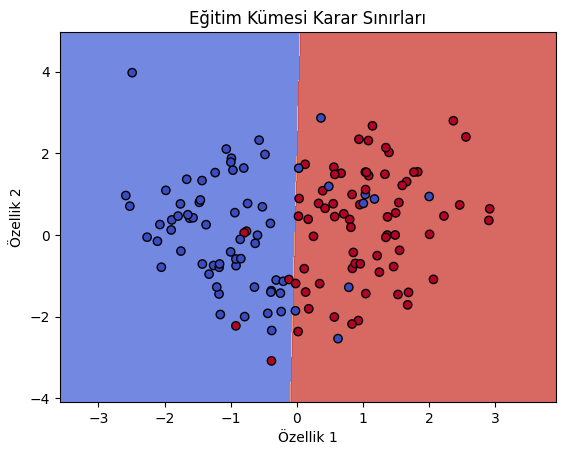

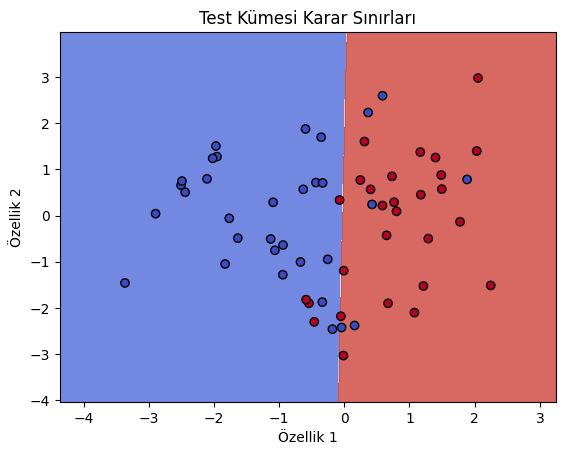

In [7]:
def karar_sinirlarini_ciz(model, X, y, baslik="Karar Sınırları"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
    plt.xlabel("Özellik 1")
    plt.ylabel("Özellik 2")
    plt.title(baslik)
    plt.show()

karar_sinirlarini_ciz(fsvm_model, X_egitim, y_egitim, baslik="Eğitim Kümesi Karar Sınırları")
karar_sinirlarini_ciz(fsvm_model, X_test, y_test, baslik="Test Kümesi Karar Sınırları")